In [13]:
# imports: 
import pandas as pd
import random
from pydub import AudioSegment
from pydub.playback import play
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import torchaudio
import torch 

# workspace folder:
direct = "E:/archive/waveformOutputs/"

# data folder:
data_dir = "E:/archive/"

#audio folder:
directToAudio = "E:/archive/test_of_data"

# output folder
savedir = "E:/archive/waveformOutputs/"

# Plot the spectrogram of given UUIds
The UUIDs of false positive/negative predictions are stored in a pickle file, the following code simply plots 5 random samples of each category.

In [11]:

# metadata_file = "undersampled_data_with_transform.csv"
# metadata=pd.read_csv(data_dir+metadata_file,sep=",")
# Load pickle data
import pickle
with open('false_pos_neg.pkl', 'rb') as f:
    metadata = pickle.load(f)
print(metadata.keys())
#print(metadata.columns)
num_samples_positives = len(metadata["False positives"])
num_samples_negatives = len(metadata["False negatives"])
#print("Number of samples:", num_samples)
#metadata

dict_keys(['False positives', 'False negatives', 'Correct'])


C:\Users\nlyho\AppData\Local\Temp\ipykernel_984\1209482929.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(directToAudio+f"/{uuid}.webm")


FileNotFoundError: [Errno 2] No such file or directory: 'False_positive_pred/spectogram_false_negative_637d6498-1d52-4860-9976-5a7a94f2a0c3.png'

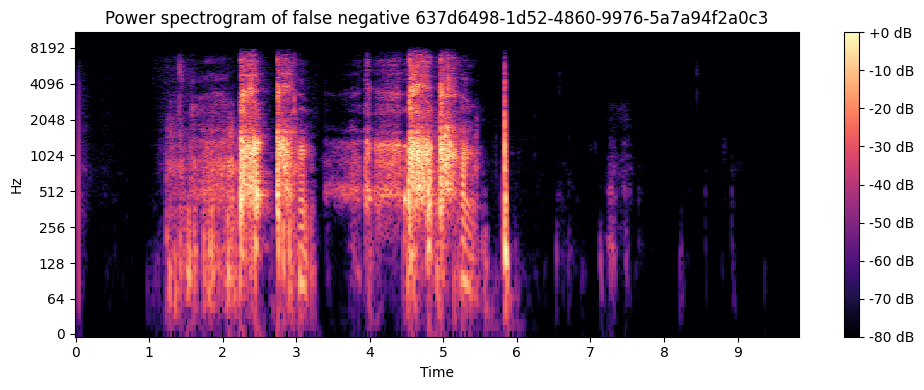

In [16]:
from random import sample
random_negatives = sample(metadata["False positives"], 5)
random_positives = sample(metadata["False negatives"], 5)
random_correct = sample(metadata["Correct"], 5)

#plot the spectogram of the audio files:
#Plots 5 false positive spectrograms:
for uuid in random_negatives:
    plt.figure(figsize=(10, 4))
    y, sr = librosa.load(directToAudio+f"/{uuid}.webm")
    D = np.abs(librosa.stft(y))
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
    plt.title(f'Power spectrogram of false negative {uuid}')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.savefig(f"Plots/False_positive_pred/spectogram_false_negative_{uuid}.png")
    plt.show()
#     # save figures :
    
# for uuid in random_positives:
# plots 5 false negative spectrograms:
#     plt.figure(figsize=(10, 4))
#     y, sr = librosa.load(directToAudio+f"/{uuid}.webm")
#     D = np.abs(librosa.stft(y))
#     librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
#     plt.title(f'Power spectrogram of false positive {uuid}')
#     plt.colorbar(format='%+2.0f dB')
#     plt.tight_layout()
#     plt.savefig("C:/Mini_project_DL/pictures/"+f"spectogram_false_positive_{uuid}.png")
#     plt.show()
#     # save figures :

#Plot 5 correct spectrograms
for uuid in random_correct:
    plt.figure(figsize=(10, 4))
    y, sr = librosa.load(directToAudio+f"/{uuid}.webm")
    D = np.abs(librosa.stft(y))
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
    plt.title(f'Power spectrogram of correct guess UUID: {uuid}')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.savefig(f"Plots/Correct_pred/spectogram_correct_{uuid}.png")
    plt.show()
    

